<a href="https://colab.research.google.com/github/ihagoSantos/image-analysis-and-computer-vision/blob/main/cbir_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Busca de vídeo com base em conteúdo visual


In [1]:
!pip install opencv-contrib-python --upgrade

In [2]:
from os import listdir
from os.path import isfile, join
import os
import os.path
import sys
import pickle

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# URL Base do diretório
base_url = '/content/drive/My Drive/Pós Graduação PUC Minas/12 - Análise de Imagem e Visão Computacional/Unidade 2/pratica'

frames_dir = "frames/"
features_dir = "features/"
cluster_dir = "cluster/"
bow_dir = "bow/"
videos = "videos/"
search = "search/"

if not os.path.exists(frames_dir):
  os.makedirs(frames_dir)

if not os.path.exists(features_dir):
  os.makedirs(features_dir)

if not os.path.exists(cluster_dir):
  os.makedirs(cluster_dir)

if not os.path.exists(bow_dir):
  os.makedirs(bow_dir)

if not os.path.exists(videos):
  os.makedirs(videos)

if not os.path.exists(search):
  os.makedirs(search)

Nenhuma técnica de detecção de quadro é aplicada nessa etapa. Apenas é obtido um frame por segundo.\
Essa não é a melhor estratégia pois informações podem ser deixadas de fora como alguns quadros, por exemplo. \
Mas isso reduz a quantidade de informações obtidas e processadas.\
Essa estratégia funcionará pois o vídeo é pequeno e é improvável que se tenha mais de uma tomada por segundo. \
Caso o vídeo fosse muito grande, essa estratégia não seria suficiente para reduzir a quantidade de informações pois estariamos pegando muitos quadros do vídeo.

In [5]:
# video path
video = f"{base_url}/airport.mp4"

# create VideoCapture object and read from video file
cap = cv2.VideoCapture(video)

#frames per second
video_frames = 30

# frame_id
id_frame = 0

ret = True
while ret:
  # capture frame by frame
  ret, frame = cap.read() # Enquanto ret for True, o vídeo ainda não acabou de ser processado.

  # vídeo length
  length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

  if (id_frame % video_frames) == 0 and ret: # pega apenas um frame a cada 30
    print(f"Processing frame {id_frame} of {length}")
    frame_path = os.path.join(frames_dir, f"{str(id_frame)}.png")
    #salva imagem (frame) no disco
    cv2.imwrite(frame_path, frame)

  id_frame += 1

print("Done")


Processing frame 0 of 749
Processing frame 30 of 749
Processing frame 60 of 749
Processing frame 90 of 749
Processing frame 120 of 749
Processing frame 150 of 749
Processing frame 180 of 749
Processing frame 210 of 749
Processing frame 240 of 749
Processing frame 270 of 749
Processing frame 300 of 749
Processing frame 330 of 749
Processing frame 360 of 749
Processing frame 390 of 749
Processing frame 420 of 749
Processing frame 450 of 749
Processing frame 480 of 749
Processing frame 510 of 749
Processing frame 540 of 749
Processing frame 570 of 749
Processing frame 600 of 749
Processing frame 630 of 749
Processing frame 660 of 749
Processing frame 690 of 749
Processing frame 720 of 749
Done


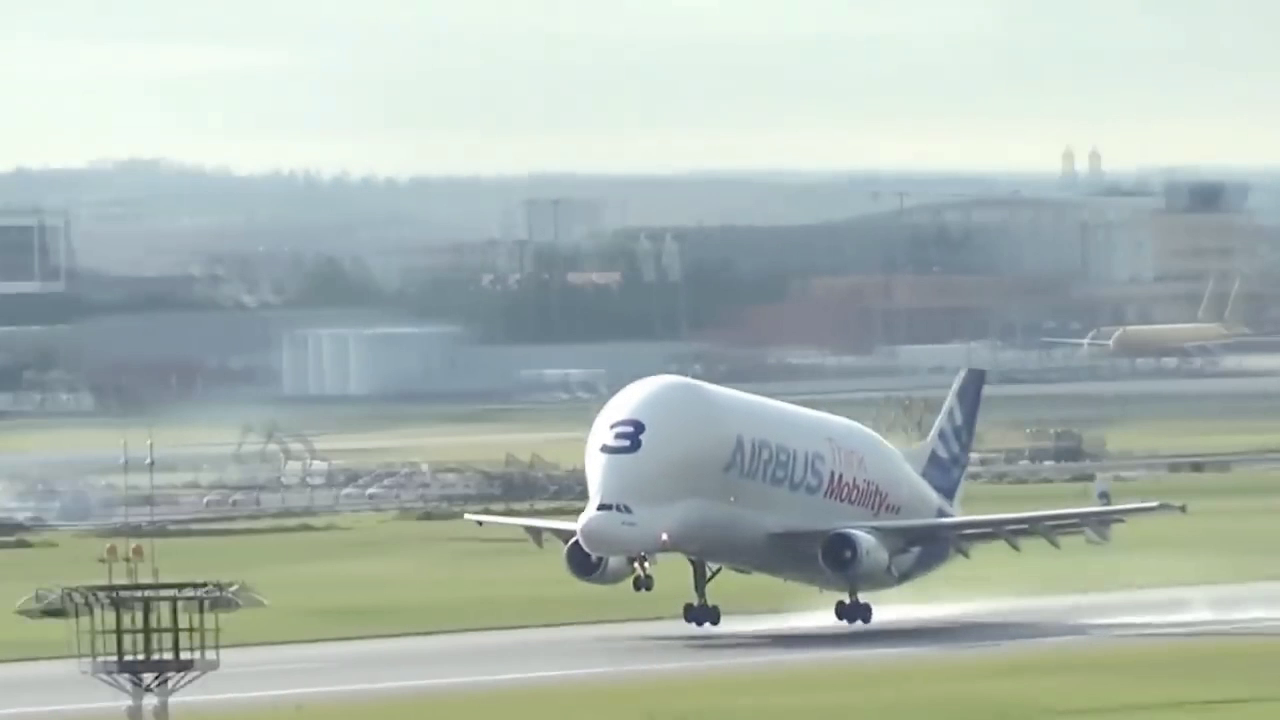

In [6]:
frame = cv2.imread(f"{frames_dir}/450.png")
cv2_imshow(frame)

## Extraindo descritores dos frames do vídeo usando BRIEF Descriptor

In [7]:
# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(frames_dir):
  onlyfiles = [f for f in listdir(frames_dir) if isfile(join(frames_dir, f))]
  print("ONLYFILES", onlyfiles)
  # processa cada arquivo de imagem de um diretório
  for file in onlyfiles:
    print(file)
    img_path = join(frames_dir, file)
    img = cv2.imread(img_path)

    # opcional: redimensiona a imagem
    # img = cv2.resize(
    #     img, (160, 160), interpolation=cv2.INTER_CUBIC
    # )

    # inicializa o STAR detector
    star = cv2.xfeatures2d.StarDetector_create()

    # inicializa o BRIEF descriptor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # acha os keypoints com STAR
    kp = star.detect(img, None)

    # computa os descritores com BRIEF
    kp, feat = brief.compute(img, kp)

    print(len(kp))
    print(np.shape(feat))

    feat_path = join(features_dir, file)

    # salva os descritores no disco em um arquivo .brief
    # o arquivo salvo contém uma lista de características de cada frame
    with open(f"{feat_path}.brief", 'wb') as f:
      pickle.dump(feat.tolist(), f) # pickle armazena em formato binário, reduzindo a quantidade de informação salva no disco


    # f = open(f"{feat_path}.brief.txt", "w")
    # f.write(str(feat.tolist()))
    # f.close()



ONLYFILES ['330.png', '630.png', '120.png', '270.png', '180.png', '360.png', '390.png', '600.png', '60.png', '300.png', '690.png', '660.png', '480.png', '450.png', '90.png', '420.png', '720.png', '150.png', '210.png', '30.png', '570.png', '240.png', '0.png', '510.png', '540.png']
330.png
151
(151, 32)
630.png
496
(496, 32)
120.png
478
(478, 32)
270.png
176
(176, 32)
180.png
507
(507, 32)
360.png
155
(155, 32)
390.png
395
(395, 32)
600.png
503
(503, 32)
60.png
474
(474, 32)
300.png
149
(149, 32)
690.png
469
(469, 32)
660.png
434
(434, 32)
480.png
139
(139, 32)
450.png
209
(209, 32)
90.png
467
(467, 32)
420.png
101
(101, 32)
720.png
59
(59, 32)
150.png
459
(459, 32)
210.png
168
(168, 32)
30.png
477
(477, 32)
570.png
431
(431, 32)
240.png
164
(164, 32)
0.png
419
(419, 32)
510.png
70
(70, 32)
540.png
423
(423, 32)


No OpenCV, StarDetector e BriefDescriptorExtractor são duas funcionalidades usadas em visão computacional para detecção e descrição de características (features) em imagens.

1. StarDetector (STAR - CenSurE)
O StarDetector é um detector de características baseado no algoritmo CenSurE (Center-Surround Extremas). Ele é projetado para detectar pontos de interesse em uma imagem de forma rápida e eficiente. Algumas características do StarDetector:

Baseado em uma abordagem de pirâmide espacial para encontrar cantos e pontos de interesse.
É rotacionalmente invariante e adequado para diferentes escalas.
Tem um desempenho rápido, sendo útil para aplicações em tempo real.
💡 Observação: A classe StarDetector foi removida nas versões mais recentes do OpenCV. Você pode substituí-la por detectores mais modernos como ORB, FAST ou SIFT.

2. BriefDescriptorExtractor (BRIEF)
O BriefDescriptorExtractor (BRIEF - Binary Robust Independent Elementary Features) é um extrator de descritores usado para representar características de uma imagem de maneira compacta. Ele não detecta pontos de interesse, mas descreve os que já foram detectados por um detector (como STAR, FAST, ORB, etc.).

Utiliza um conjunto fixo de pares de pixels para comparar intensidades e gerar um descritor binário.
É rápido e eficiente, tornando-o ideal para sistemas em tempo real.
Funciona melhor com detectores rápidos como FAST ou CenSurE.
💡 Observação: Assim como o StarDetector, o BriefDescriptorExtractor foi descontinuado nas versões mais recentes do OpenCV. O ORB (Oriented FAST and Rotated BRIEF) é um substituto moderno que combina um detector de características (FAST) e um descritor baseado no BRIEF com melhorias.

A principal diferença entre **StarDetector** e **BriefDescriptorExtractor** está na função que cada um desempenha no processo de extração de características em imagens.

### 1. **StarDetector → Detector de Características**  
- **O que faz?** Identifica pontos de interesse (keypoints) em uma imagem.  
- **Como funciona?** Usa o algoritmo **CenSurE (Center-Surround Extremas)** para encontrar regiões da imagem com mudanças significativas, como cantos e bordas.  
- **Saída:** Lista de keypoints (posição, escala e orientação).  

📌 **Exemplo de outros detectores:** FAST, SIFT, ORB, Harris.

---

### 2. **BriefDescriptorExtractor → Extrator de Descritores**  
- **O que faz?** Gera descritores para os keypoints detectados.  
- **Como funciona?** Compara pares de pixels próximos ao ponto de interesse e codifica essas diferenças como um vetor binário.  
- **Saída:** Um vetor de descritores binários para cada keypoint, que pode ser usado para reconhecimento de padrões e matching entre imagens.  

📌 **Exemplo de outros extratores:** SIFT, SURF, ORB, FREAK.

---

### 📌 Diferença essencial:
- **StarDetector encontra os pontos interessantes.**  
- **BriefDescriptorExtractor descreve esses pontos para facilitar o reconhecimento.**  

💡 Para detectar e descrever características, normalmente combinamos os dois. Como os dois foram descontinuados no OpenCV, o **ORB** faz ambos de forma eficiente. 🚀